In [11]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd

ROOT = Path.cwd().resolve().parents[0]  # assumes you run the notebook from notebooks/
sys.path.insert(0, str(ROOT))

df = pd.read_csv(ROOT / "data" / "processed" / "xfoil_polars.csv")
df = df[df["CD"] > 0].copy()  # safety for log(CD)

print(df.shape)
df.head()



(79, 7)


,alpha_deg,CL,CD,CM,Re,Mach,airfoil
0,-5.0,-0.3139,0.00862,-0.0582,1000000.0,0.2,NACA 2412
2,-4.5,-0.2582,0.00824,-0.0575,1000000.0,0.2,NACA 2412
4,-4.0,-0.2024,0.00786,-0.0569,1000000.0,0.2,NACA 2412
6,-3.5,-0.1463,0.00752,-0.0564,1000000.0,0.2,NACA 2412
8,-3.0,-0.0903,0.00721,-0.0559,1000000.0,0.2,NACA 2412


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[["alpha_deg", "Re", "Mach"]].to_numpy()
y_cl = df["CL"].to_numpy()
y_cd_log = np.log(df["CD"].to_numpy())

X_train, X_test, ycl_train, ycl_test, ycd_train, ycd_test = train_test_split(
    X, y_cl, y_cd_log, test_size=0.2, random_state=42
)

m_cl = RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1)
m_cd = RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1)

m_cl.fit(X_train, ycl_train)
m_cd.fit(X_train, ycd_train)

pred_cl = m_cl.predict(X_test)

# back-transform CD
pred_cd = np.exp(m_cd.predict(X_test))
true_cd = np.exp(ycd_test)

print("CL  MAE:", mean_absolute_error(ycl_test, pred_cl))
print("CL RMSE:", np.sqrt(mean_squared_error(ycl_test, pred_cl)))
print("CL   R2:", r2_score(ycl_test, pred_cl))

print("\nCD  MAE:", mean_absolute_error(true_cd, pred_cd))
print("CD RMSE:", np.sqrt(mean_squared_error(true_cd, pred_cd)))
print("CD   R2:", r2_score(true_cd, pred_cd))


CL  MAE: 0.016459312499997707
CL RMSE: 0.01987991008163807
CL   R2: 0.998962714559868

CD  MAE: 0.0009695408940883464
CD RMSE: 0.0014543089255188834
CD   R2: 0.948969275337084


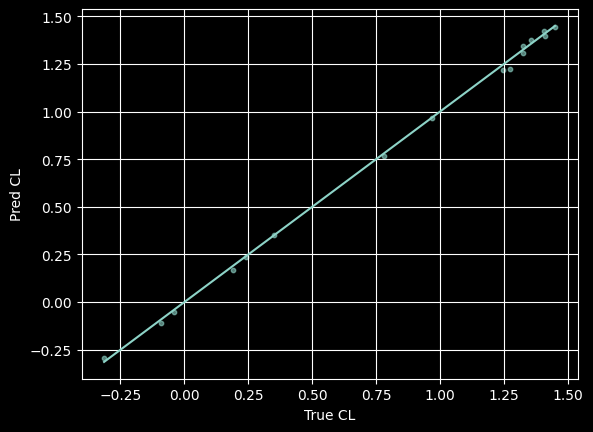

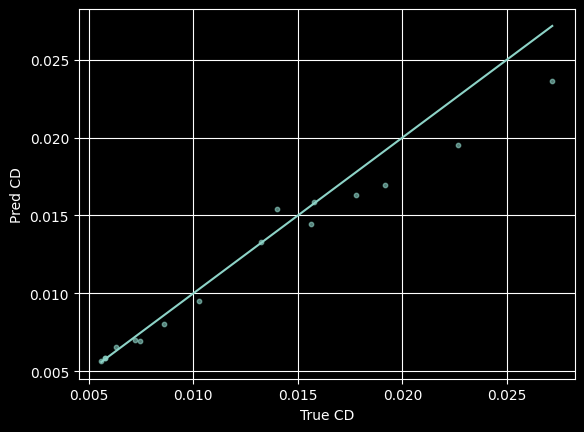

In [13]:
import matplotlib.pyplot as plt

# CL
plt.figure()
plt.scatter(ycl_test, pred_cl, s=10, alpha=0.6)
mn, mx = min(ycl_test.min(), pred_cl.min()), max(ycl_test.max(), pred_cl.max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("True CL")
plt.ylabel("Pred CL")
plt.grid(True)
plt.show()

# CD
plt.figure()
plt.scatter(true_cd, pred_cd, s=10, alpha=0.6)
mn, mx = min(true_cd.min(), pred_cd.min()), max(true_cd.max(), pred_cd.max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("True CD")
plt.ylabel("Pred CD")
plt.grid(True)
plt.show()


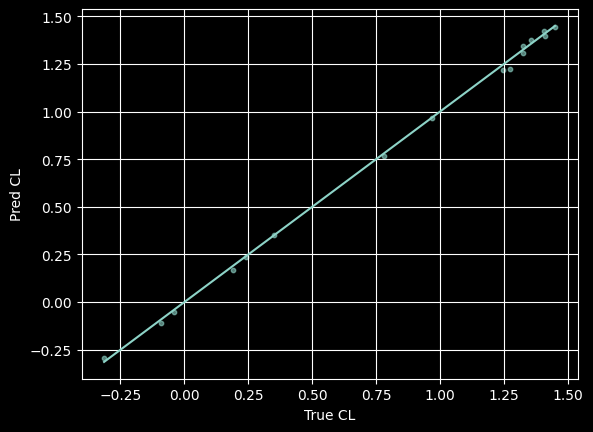

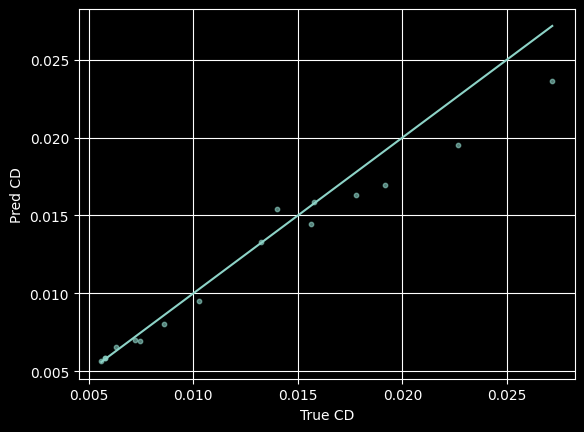

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions (aus dem log-CD Ansatz)
pred_cl = m_cl.predict(X_test)
pred_cd = np.exp(m_cd.predict(X_test))
true_cd = np.exp(ycd_test)

# CL plot
plt.figure()
plt.scatter(ycl_test, pred_cl, s=10, alpha=0.6)
mn, mx = min(ycl_test.min(), pred_cl.min()), max(ycl_test.max(), pred_cl.max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("True CL")
plt.ylabel("Pred CL")
plt.grid(True)
plt.show()

# CD plot
plt.figure()
plt.scatter(true_cd, pred_cd, s=10, alpha=0.6)
mn, mx = min(true_cd.min(), pred_cd.min()), max(true_cd.max(), pred_cd.max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("True CD")
plt.ylabel("Pred CD")
plt.grid(True)
plt.show()


In [ ]:
print("Rows:", len(df))
print("Unique alphas:", df["alpha_deg"].nunique())


In [ ]:
df = pd.read_csv(ROOT / "data" / "processed" / "xfoil_polars.csv")
print("Rows:", len(df))
print("Unique alphas:", df["alpha_deg"].nunique())
print(df.groupby(["Re","Mach"]).size())


In [ ]:
df["CD"].describe()


In [ ]:
(df["CD"] <= 0).sum(), df[df["CD"] <= 0].head()


In [ ]:
df = df[df["CD"] > 0].copy()
